<a href="https://colab.research.google.com/github/prakriti123rai/make-a-pr/blob/master/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime
from numpy import percentile
import nltk
from nltk.corpus import stopwords

In [ ]:
data = pd.read_csv("INvideos.csv", encoding="utf-8",error_bad_lines=False, engine= 'python')

<ipython-input-2-24e6dc6290c5>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("INvideos.csv", encoding="utf-8",error_bad_lines=False, engine= 'python')
Skipping line 4268: unexpected end of data


In [ ]:
data.shape

(4266, 16)

In [ ]:
data.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...


In [ ]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4266 entries, 0 to 4265
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                4266 non-null   object
 1   trending_date           4266 non-null   object
 2   title                   4266 non-null   object
 3   channel_title           4266 non-null   object
 4   category_id             4266 non-null   int64 
 5   publish_time            4266 non-null   object
 6   tags                    4266 non-null   object
 7   views                   4266 non-null   int64 
 8   likes                   4266 non-null   int64 
 9   dislikes                4266 non-null   int64 
 10  comment_count           4266 non-null   int64 
 11  thumbnail_link          4266 non-null   object
 12  comments_disabled       4266 non-null   bool  
 13  ratings_disabled        4266 non-null   bool  
 14  video_error_or_removed  4266 non-null   bool  
 15  desc

In [ ]:
with open("IN_category_id.json") as f:
   category = json.load(f)

#Pre-Processing

Removing unwanted columns

In [ ]:
# Removing thumbnail_link as it is not required in further analysis
data.drop(columns=['thumbnail_link'],inplace=True)

In [ ]:
data.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [ ]:


data.isna().sum()

video_id                   0
trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               88
dtype: int64

In [ ]:


data.drop(columns= ['description'], inplace =True)

There are now no null values in the dataset

In [ ]:
data.isna().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

In [ ]:
id_to_category={}
items = category['items']
for i in category['items']:
        id_to_category[int(i['id'])] = i['snippet']['title']
id_to_category

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [ ]:
data.insert(4, 'category', data['category_id'].map(id_to_category))
data[['category_id', 'category']].head()

,category_id,category
0,1,Film & Animation
1,25,News & Politics
2,24,Entertainment
3,23,Comedy
4,24,Entertainment


In [ ]:
data.head()

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,Film & Animation,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,News & Politics,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,Entertainment,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,Comedy,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,Entertainment,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False


In [ ]:
data.tail()

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
4261,s0nJ75BGcPE,17.06.12,Ranbir Kapoor Cries On Shashi Kapoor's Last Rites,Unitezz Media Official,Entertainment,24,2017-12-05T06:31:50.000Z,Ranbir Kapoor Cries On Shashi Kapoor's Last Ri...,55093,45,146,5,False,False,False
4262,qKq4tXEd7Wk,17.06.12,"Cyclone Ockhi: Schools closed in Maharashtra, ...",News 24,News & Politics,25,2017-12-05T05:40:23.000Z,"news 24|""news24 channel""|""live news hindi""|""hi...",70377,244,57,25,False,False,False
4263,nylKJ3CXyic,17.06.12,India News: Cyclone fallout- Heavy rain in Mumbai,WION,News & Politics,25,2017-12-04T16:58:07.000Z,"World Is One News|""WION""|""wion""|""Cyclone Ockhi...",63994,131,13,16,False,False,False
4264,o_zLoJondXM,17.06.12,Anchor About His Marriage & Personal Life || T...,TV9 Entertainment,Entertainment,24,2017-12-03T16:24:13.000Z,"TV9 EntertainmentTelugu film news|""Tollywood u...",109898,239,208,122,False,False,False
4265,eTJbHt9Bkro,17.06.12,SnG: What If You Woke Up As The Opposite Sex? ...,SnG Comedy,Comedy,23,2017-12-05T06:30:01.000Z,"richa|""chadha""|""fukrey""|""returns""|""sng""|""comed...",51266,2232,30,321,False,False,False


Now, we will clean the publish_time and trending_date columns as they are in different format. publish_time column has date as well as the time of publish and simce trending date doesnot contain time , we cannot compare them . Therefore, we will remove the time from the publish_date column and covert them into same format.

In [ ]:
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')
data['trending_date'].head()

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [ ]:
def clean_publish_time(time):
    y,m,d = time.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

In [ ]:
data['publish_time'] = data['publish_time'].apply(clean_publish_time)

In [ ]:
data['publish_time']

0       2017-11-12
1       2017-11-13
2       2017-11-12
3       2017-11-12
4       2017-11-13
           ...    
4261    2017-12-05
4262    2017-12-05
4263    2017-12-04
4264    2017-12-03
4265    2017-12-05
Name: publish_time, Length: 4266, dtype: object

In [ ]:
data.head(3)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,Film & Animation,1,2017-11-12,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,News & Politics,25,2017-11-13,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,Entertainment,24,2017-11-12,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False


#Feature Engineering

In [ ]:
data['publish_time']=pd.to_datetime(data['publish_time'])

In [ ]:
# Calculate day of the week and create a new column
data['day_of_week'] = data['publish_time'].dt.dayofweek

In [ ]:
# Calculate time of day (hour) and create a new column
data['time_of_day'] = data['publish_time'].dt.hour

In [ ]:
# Categorize time of day into segments
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data['time_of_day_segment'] = data['time_of_day'].apply(categorize_time)

In [ ]:
from datetime import datetime
current_date=datetime.now()
data['video_age']=(current_date-data['publish_time']).dt.days

In [ ]:
data['like_ratio']=(data['likes'])/(data['likes']+data['dislikes'])
data['dislike_ratio']=(data['dislikes'])/(data['likes']+data['dislikes'])

In [ ]:
# Save the updated dataset
data.to_csv('IN_videos_with_day.csv', index=False)

In [ ]:
data.head(3)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,...,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,day_of_week,time_of_day,time_of_day_segment,video_age,like_ratio,dislike_ratio
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,Film & Animation,1,2017-11-12,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,...,882,False,False,False,6,0,Night,2114,0.977045,0.022955
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,News & Politics,25,2017-11-13,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,...,0,True,False,False,0,0,Night,2113,0.448444,0.551556
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,Entertainment,24,2017-11-12,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,...,149,False,False,False,6,0,Night,2114,0.892192,0.107808


Cleaning the video title and keeping only the necessary words

In [ ]:
nltk.download('stopwords')
def clean_titles(title):
    tokens = title.lower().split()
    cleaned = []
    sw = set(stopwords.words('english'))
    for token in tokens:
        if token.startswith('$') or token.isnumeric() or not token.isalnum() or token in sw:  # Remove money amount, non-alphanumeric tokens, or stopwords
            continue
        else:
            cleaned.append(token)
    return ' '.join(cleaned)

data['title_cl'] = data['title'].apply(clean_titles)
#Lets check for result
data.tail(n=3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,...,comments_disabled,ratings_disabled,video_error_or_removed,day_of_week,time_of_day,time_of_day_segment,video_age,like_ratio,dislike_ratio,title_cl
4263,nylKJ3CXyic,2017-12-06,India News: Cyclone fallout- Heavy rain in Mumbai,WION,News & Politics,25,2017-12-04,"World Is One News|""WION""|""wion""|""Cyclone Ockhi...",63994,131,...,False,False,False,0,0,Night,2092,0.909722,0.090278,india cyclone heavy rain mumbai
4264,o_zLoJondXM,2017-12-06,Anchor About His Marriage & Personal Life || T...,TV9 Entertainment,Entertainment,24,2017-12-03,"TV9 EntertainmentTelugu film news|""Tollywood u...",109898,239,...,False,False,False,6,0,Night,2093,0.534676,0.465324,anchor marriage personal life tv9 et
4265,eTJbHt9Bkro,2017-12-06,SnG: What If You Woke Up As The Opposite Sex? ...,SnG Comedy,Comedy,23,2017-12-05,"richa|""chadha""|""fukrey""|""returns""|""sng""|""comed...",51266,2232,...,False,False,False,1,0,Night,2091,0.986737,0.013263,woke opposite richa chadha big question s2 ep20


#Outlier Elimination Using IQR

<Axes: xlabel='dislikes', ylabel='Density'>

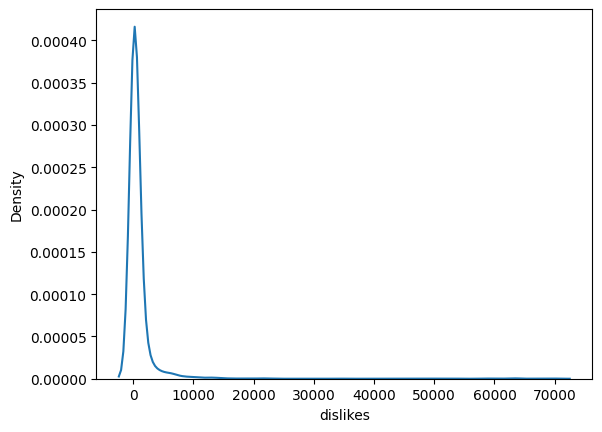

In [ ]:
#plot the distribution of dislikes
sns.kdeplot(x = "dislikes", data = data)

In [ ]:
# The dislike values are wide in range so we use log transforming

In [ ]:
data['log_dislikes'] = np.log1p(data['dislikes'])

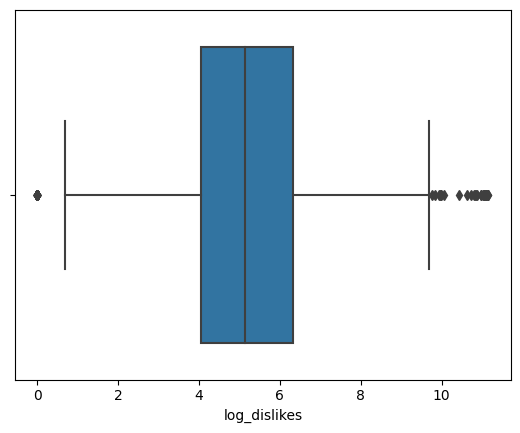

In [ ]:
boxplot = sns.boxplot(data = data,x = 'log_dislikes')

<Axes: xlabel='log_dislikes', ylabel='Density'>

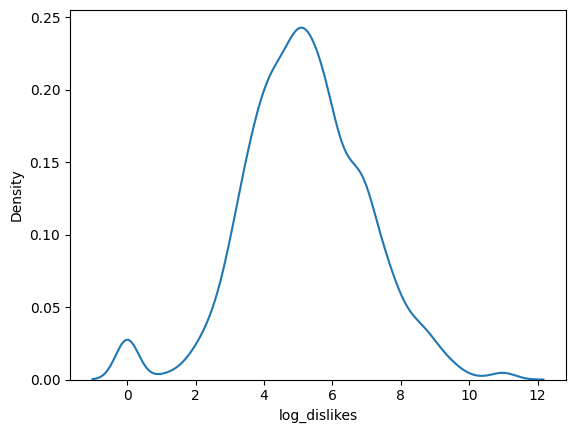

In [ ]:
sns.kdeplot(x = "log_dislikes", data = data)

<Axes: xlabel='comment_count', ylabel='Density'>

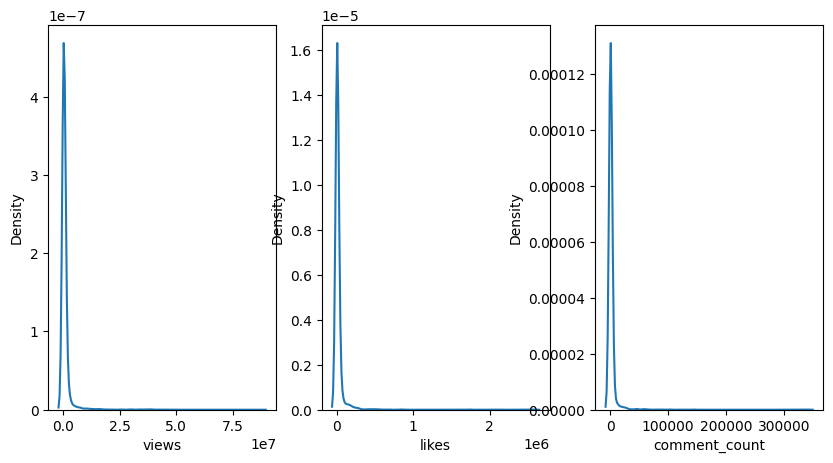

In [ ]:
fig, axes = plt.subplots(figsize=(10, 5),nrows = 1, ncols = 3)
sns.kdeplot(x = "views", data = data, ax=axes[0])
sns.kdeplot(x = "likes", data = data, ax=axes[1])
sns.kdeplot(x = "comment_count", data = data, ax=axes[2])

In [ ]:
data['log_views'] = np.log1p(data['views'])
data['log_likes'] = np.log1p(data['likes'])
data['log_comment_count'] = np.log1p(data['comment_count'])

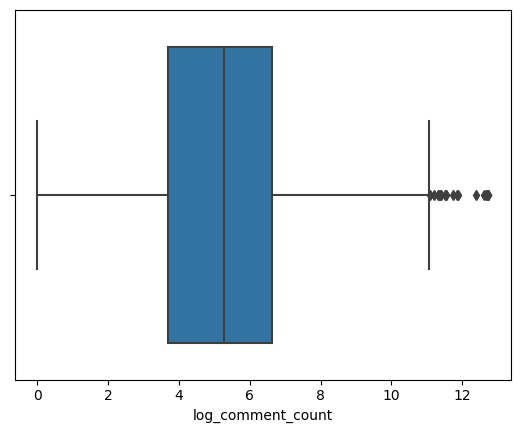

In [ ]:

boxplot = sns.boxplot(data = data,x = 'log_comment_count')

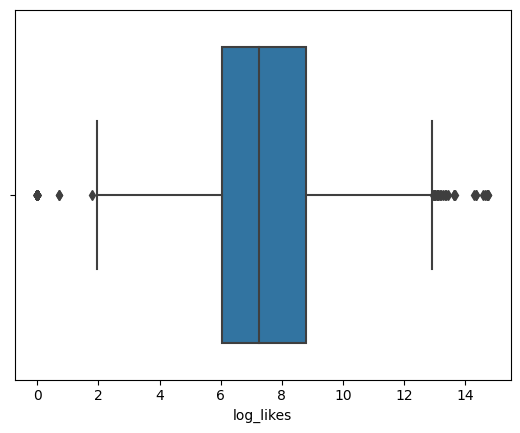

In [ ]:
boxplot = sns.boxplot(data = data,x = 'log_likes')

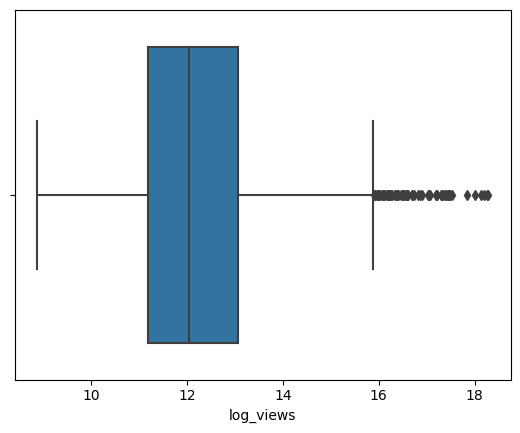

In [ ]:
boxplot = sns.boxplot(data = data,x = 'log_views')

In [ ]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            print('Count of outliers are:',x+y)
            data = data[(data[col]>LLP) & (data[col]<ULP)]
            return data


In [ ]:
x = ['log_dislikes', 'log_likes', 'log_comment_count', 'log_views']

In [ ]:
for i in x:
    data = count_outliers(data,i)

There are outliers in log_dislikes
Count of outliers are: 125
There are outliers in log_likes
Count of outliers are: 13
There are outliers in log_comment_count
Count of outliers are: 10
There are outliers in log_views
Count of outliers are: 42


Now, after the removal of all the outliers existing in the dataset, we will remove the extra columns that we created

In [ ]:
data = data.drop(columns = ['log_dislikes','log_likes','log_views','log_comment_count'])

In [ ]:
data.shape

(4076, 22)

#Data Visualization

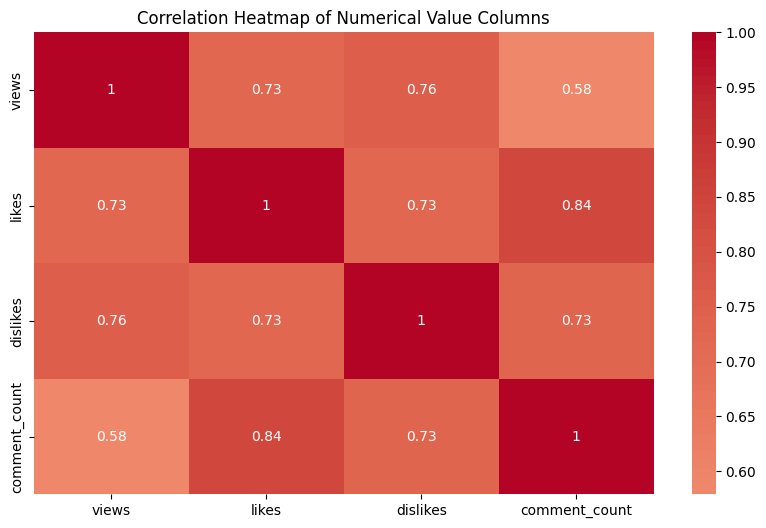

In [ ]:
# Select numerical columns
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']

# Calculate correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Value Columns')
plt.show()

As we can see there is a positive correlation between the different features.Positive correlation helps in obtaining better accuracy to
predict the lifecycle of trending videos.

In [ ]:
from collections import Counter
cnt = Counter()

# Finding the occurence of words in video titles
for title in data['title_cl']:
    for token in title.split():
        cnt[token] += 1

# Finding the 50 most used words in video titles
dist = cnt.most_common(50)
top_words = []
freqs = []
for word, freq in dist:
    top_words.append(word)
    freqs.append(freq)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


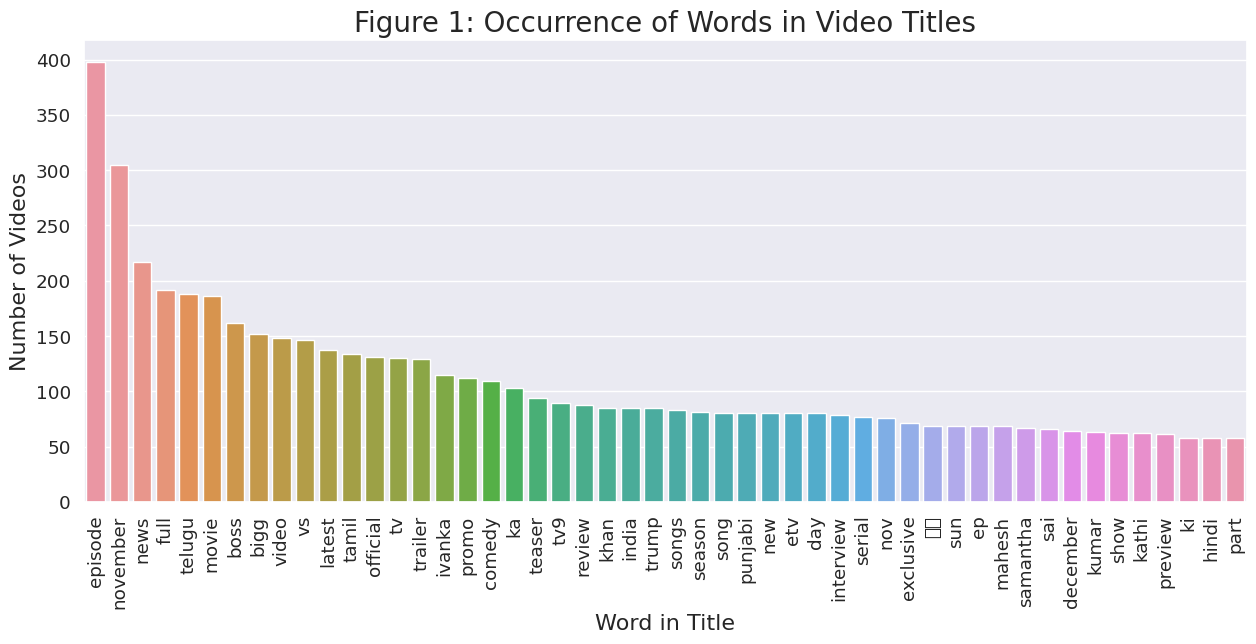

In [ ]:
# Graphing number of times the world occure in title
fig= plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

sns.barplot(x=top_words,y=freqs)

plt.xticks(rotation=90)
plt.xlabel('Word in Title', fontsize=16)
plt.ylabel('Number of Videos', fontsize=16)
plt.title('Figure 1: Occurrence of Words in Video Titles', fontsize=20)
plt.show()

From the figure we can see that Top words that are used in title by different channels.

Now, lets find what category are videos are most trending

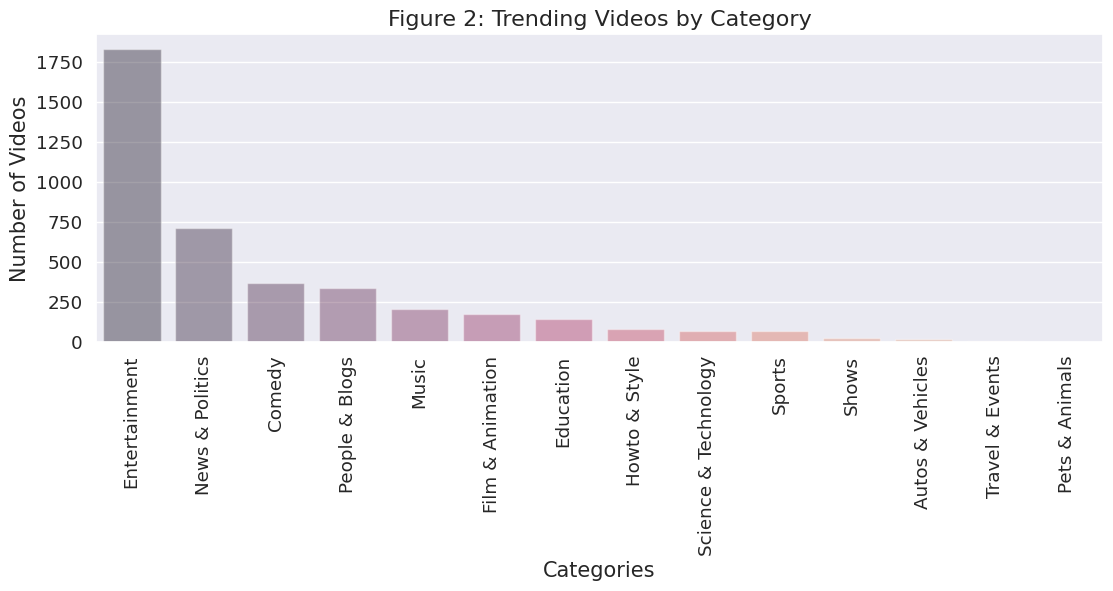

In [ ]:
# Bar graph for number of videos per category
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

categories = data['category'].value_counts()

plt.figure(figsize=(13,4))
sns.barplot(x= categories.index, y=categories.values, alpha=0.4, palette="rocket")

sns.set(font_scale=1.2)
plt.xticks(rotation=90)
plt.xlabel('Categories', fontsize=15)
plt.ylabel('Number of Videos', fontsize=15)
plt.title('Figure 2: Trending Videos by Category', fontsize=16)
plt.show()

###Most trending videos as seen from graph belongs to Entertainment category followed by News&Politics
###And the category which has very less number of trending videos belongs to category Pets & Animals

Now, lets see the percentage of top 4 and bottom 4 categories

In [ ]:
# Caculating the percentages for top 4 categories
entertainment = data[data['category'] == 'Entertainment']['category'].count() / data['category'].count() * 100
news = data[data['category'] == 'News & Politics']['category'].count() / data['category'].count() * 100
music = data[data['category'] == 'Music']['category'].count() / data['category'].count() * 100
comedy = data[data['category'] == 'Comedy']['category'].count() / data['category'].count() * 100

# Calculating the percentages for bottom 3 categories
travelandevents = data[data['category_id'] == 'Travel & Events']['category_id'].count() / data['category'].count() * 100
petsandanimals = data[data['category_id'] == 'Pets & Animals']['category_id'].count() / data['category'].count() * 100
movies = data[data['category_id'] == 'Movies']['category_id'].count() / data['category_id'].count() * 100

In [ ]:
#Lets print the percentages
print("Top 5:")
print("Entertainment:",entertainment)
print("News & Politics:",news)
print("Music:",music)
print("Comedy:",comedy)
print("\n")
print("Least 3:")
print("Travel & Events:",travelandevents)
print("Pets & Animals",petsandanimals)
print("Movies: ",movies)

Top 5:
Entertainment: 45.17003449975358
News & Politics: 17.520946278955147
Music: 5.150320354854608
Comedy: 9.068506653523903


Least 3:
Travel & Events: 0.0
Pets & Animals 0.0
Movies:  0.0


Top 4 categories makes upto more tha 60% of the entire dataset

In [ ]:
# Lets find out which channel has the largest number of videos

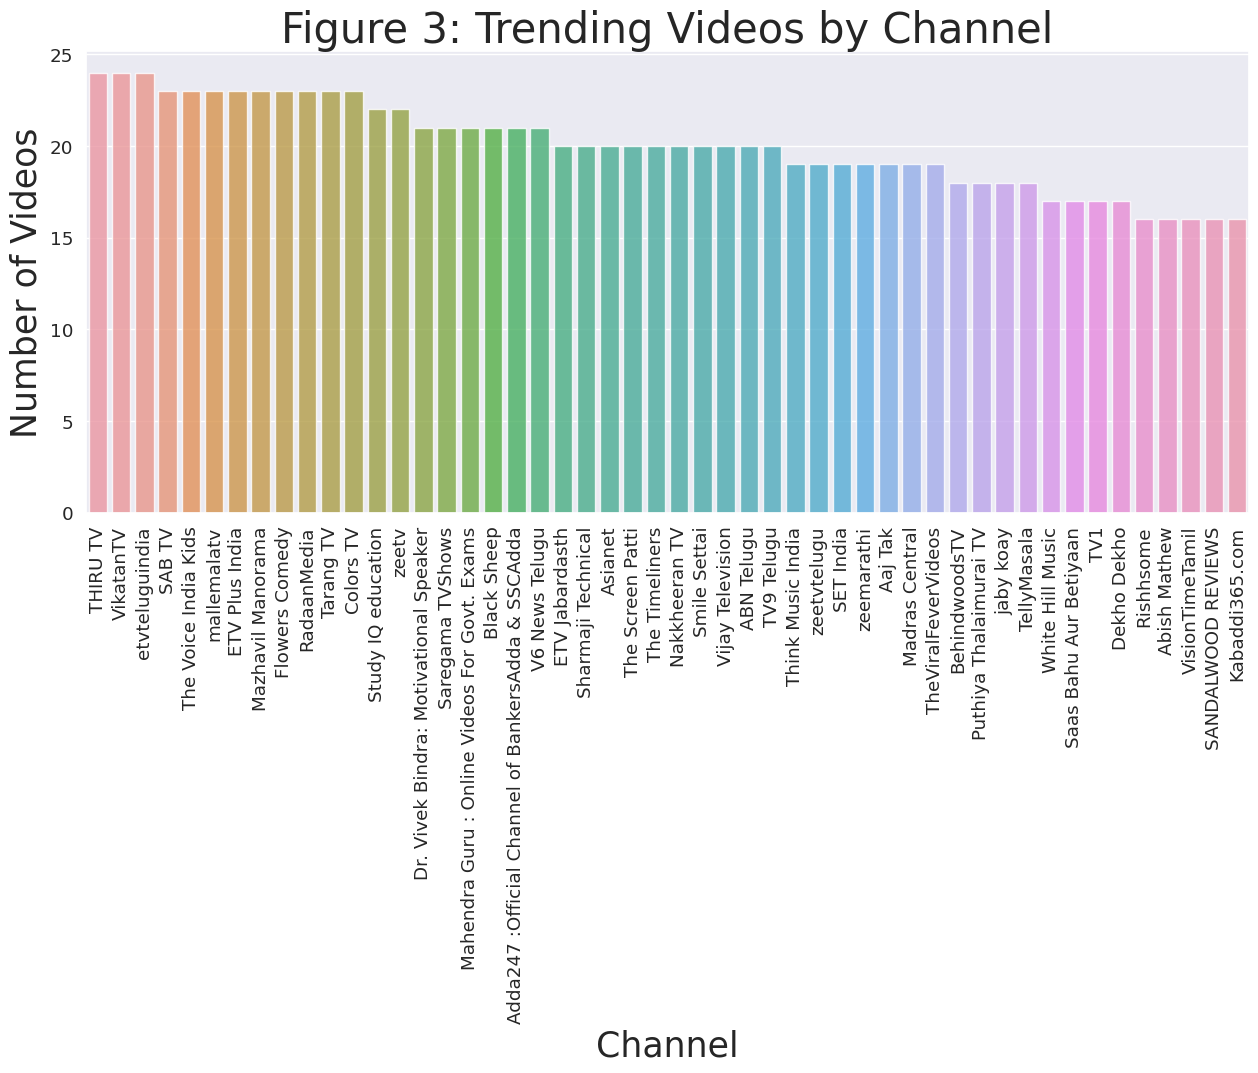

In [ ]:

sns.set(font_scale=1.2)

channel_freq = data['channel_title'].value_counts()
channel_freq = channel_freq[0:50]

# Bar graph for number of videos for the top 50 channels
plt.figure(figsize=(15, 6))
sns.barplot(x=channel_freq.index, y=channel_freq.values, alpha=0.8)

plt.xticks(rotation=90)
plt.xlabel('Channel', fontsize=25)
plt.ylabel('Number of Videos', fontsize=25)
plt.title('Figure 3: Trending Videos by Channel', fontsize=30)
plt.show()

In [ ]:
channel_freq[0:10]

THIRU TV                24
VikatanTV               24
etvteluguindia          24
SAB TV                  23
The Voice India Kids    23
mallemalatv             23
ETV Plus India          23
Mazhavil Manorama       23
Flowers Comedy          23
RadaanMedia             23
Name: channel_title, dtype: int64

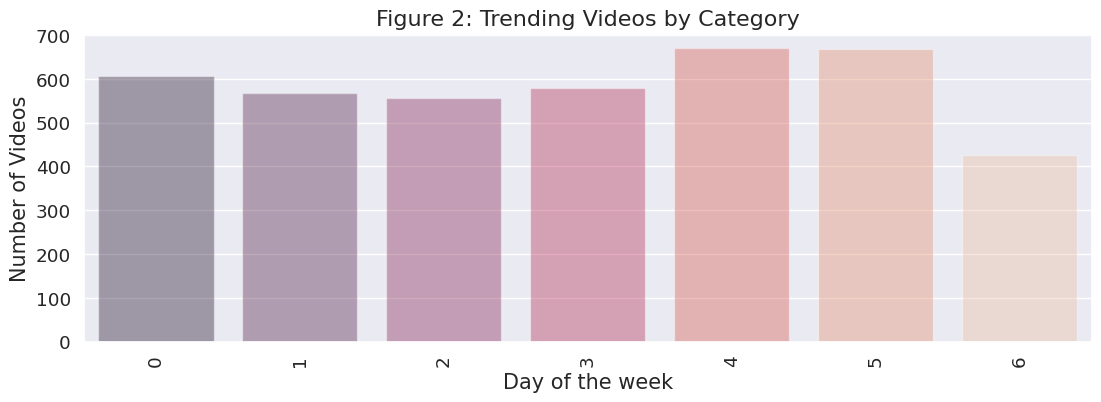

In [ ]:
#Visualising the impact of publishing day of the video on the  trendiness of a video
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

categories = data['day_of_week'].value_counts()

plt.figure(figsize=(13,4))
sns.barplot(x= categories.index, y= categories.values, alpha=0.4, palette="rocket")

sns.set(font_scale=1.2)
plt.xticks(rotation=90)
plt.xlabel('Day of the week', fontsize=15)
plt.ylabel('Number of Videos', fontsize=15)
plt.title('Figure 2: Trending Videos by Category', fontsize=16)
plt.show()

In [ ]:
# Lets see the impact of features such as rating_disabled and comment_disabled on making a video trending

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
features = ['ratings_disabled', 'comments_disabled', 'video_error_or_removed']

In [ ]:
for x in features:
  data[x] = le.fit_transform(data[x])

In [ ]:
data.head(2)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,...,comments_disabled,ratings_disabled,video_error_or_removed,day_of_week,time_of_day,time_of_day_segment,video_age,like_ratio,dislike_ratio,title_cl
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,Film & Animation,1,2017-11-12,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,...,0,0,0,6,0,Night,2114,0.977045,0.022955,sharry cute munda song parmish verma releasing...
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,News & Politics,25,2017-11-13,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,...,1,0,0,0,0,Night,2113,0.448444,0.551556,पर रह


In [ ]:
data['ratings_disabled'].value_counts()

0    4076
Name: ratings_disabled, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

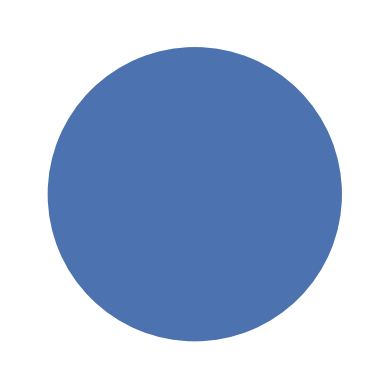

In [ ]:
ratings = data['ratings_disabled'].value_counts()
plt.pie(ratings)
plt.show

In [ ]:
data['comments_disabled'].value_counts()

0    3979
1      97
Name: comments_disabled, dtype: int64

where 0 = False, 1= True

<function matplotlib.pyplot.show(close=None, block=None)>

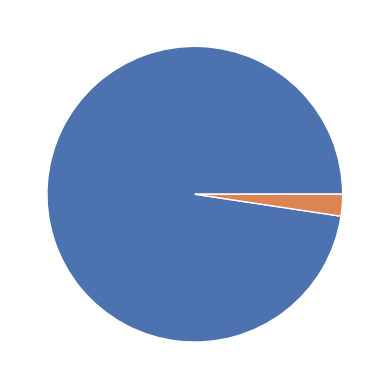

In [ ]:

c_dis = data['comments_disabled'].value_counts()
plt.pie(c_dis)
plt.show

As we can see, most of the channels have enabled comments and ratings which helps them to get the proper feedback from the user and improve the quality of the upcoming videos.

#Model Building

Linear Regression-Predicting popularity metrics




Prediction of Number of views that a video will have

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4076 entries, 0 to 4265
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                4076 non-null   object        
 1   trending_date           4076 non-null   datetime64[ns]
 2   title                   4076 non-null   object        
 3   channel_title           4076 non-null   object        
 4   category                4058 non-null   object        
 5   category_id             4076 non-null   int64         
 6   publish_time            4076 non-null   datetime64[ns]
 7   tags                    4076 non-null   object        
 8   views                   4076 non-null   int64         
 9   likes                   4076 non-null   int64         
 10  dislikes                4076 non-null   int64         
 11  comment_count           4076 non-null   int64         
 12  comments_disabled       4076 non-null   int64   

In [ ]:
# Define features (X) and target (Y)
x= data.drop(columns = ['video_id', 'views','trending_date', 'title','channel_title','category','publish_time','tags','time_of_day_segment','title_cl'])
y = data['views']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
X = scaler.fit_transform(x)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = model.score(X_test, y_test)

In [ ]:
y_pred

array([ 1769728.,   477056.,   169088.,   253440.,   182272.,   253568.,
         392576.,  1485440.,   235520.,   192128.,   296704.,   162304.,
         407808.,   187520.,   174208.,   165760.,   332160.,   157696.,
         167296.,   408704.,   189056.,   186752.,   369280.,   185984.,
         142976.,   145024.,   222208.,   173568.,   117376.,   516096.,
         580480.,   371200.,   284160.,   516480.,   164224.,  1804288.,
         363648.,   219520.,   135040.,   487552.,   540800.,   229632.,
         234240.,   197376.,   162176.,   813824.,   650368.,   291968.,
         221952.,   148992.,   394240.,  1127808.,   276096.,   387200.,
         195456.,   105984.,   211328.,   217728.,   112768.,   162688.,
         802176.,   486400.,   146304.,   497536.,   127616.,   438528.,
         275328.,   227712.,   217984.,   627968.,   545280.,   179584.,
         107776.,   658176.,   204416.,   124416.,   111616.,   150784.,
         545920.,   233216.,   660608.,  1896448., 

In [ ]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 214448704667.63727
R-squared: 0.647208305183353


In [ ]:
model_score=model.score(X_train, y_train)
print("Model Score:",model_score)

Model Score: 0.685793920194719


#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decision_model = DecisionTreeRegressor(max_depth=5, random_state = 2)

In [ ]:
decision_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=2)

In [ ]:
decision_score=decision_model.score(X_train, y_train)
print("Decision model score for train data:",decision_score)

Decision model score for train data: 0.818645861740412


In [ ]:
dec=decision_model.score(X_test, y_test)
print("Decision model score for test data: ",dec)

Decision model score for test data:  0.713663687673936


In [ ]:
pred= decision_model.predict(X_test)
pred

array([ 96344.28977709, 767943.41935484,  96344.28977709, ...,
       301159.45109135,  96344.28977709, 205159.82857143])

In [ ]:
import pickle
# now you can save it to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(decision_model, f)

###Prediction of time that will be taken by a video to trend on youtube

In [ ]:
# Adding the new column that will show the number of days taken by a video to trend

In [ ]:
start_date = pd.to_datetime(data['publish_time'])
end_date = pd.to_datetime(data['trending_date'])
data['num_days'] = (end_date - start_date).dt.days
data['num_days']

0       2
1       1
2       2
3       2
4       1
       ..
4261    1
4262    1
4263    2
4264    3
4265    1
Name: num_days, Length: 4076, dtype: int64

In [ ]:
data.head(1)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,...,ratings_disabled,video_error_or_removed,day_of_week,time_of_day,time_of_day_segment,video_age,like_ratio,dislike_ratio,title_cl,num_days
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,Film & Animation,1,2017-11-12,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,...,0,0,6,0,Night,2114,0.977045,0.022955,sharry cute munda song parmish verma releasing...,2


In [ ]:
data.isna().sum()

video_id                   0
trending_date              0
title                      0
channel_title              0
category                  18
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
day_of_week                0
time_of_day                0
time_of_day_segment        0
video_age                  0
like_ratio                 0
dislike_ratio              0
title_cl                   0
num_days                   0
dtype: int64

In [ ]:
x1= data.drop(columns = ['video_id','num_days','trending_date', 'title','channel_title','category','publish_time','tags','time_of_day_segment','title_cl'])
y1 = data['num_days']

In [ ]:
X1 = scaler.fit_transform(x1)

In [ ]:
# Split the dataset into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=54)

###Logisic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression()

In [ ]:
classifier.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
classifier_score_train=classifier.score(X_train1, y_train1)
print("Classifier score for train data:",classifier_score_train)

Classifier score for train data: 0.3717791411042945


In [ ]:
classifier_score_test=classifier.score(X_test1, y_test1)
print("Classifier score for test data:",classifier_score_test)

Classifier score for test data: 0.36764705882352944


###Random forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Days = RandomForestRegressor(max_depth = 9, n_estimators = 150, random_state = 42)

In [ ]:
Days.fit(X_train1, y_train1)

RandomForestRegressor(max_depth=9, n_estimators=150, random_state=42)

In [ ]:
Days.score(X_train1, y_train1)

0.6153087903656411

In [ ]:
Days.score(X_test1, y_test1)

0.36673911681538285

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
reg = KNeighborsRegressor(n_neighbors=5)

In [ ]:
reg.fit(X_train1, y_train1)

KNeighborsRegressor()

In [ ]:
reg.score(X_train1, y_train1)

0.46209152299688183

In [ ]:
reg.score(X_test1, y_test1)

0.19645778721534746

##Predicting the number of days video will trend on trending list

In [ ]:
data['video_id'].value_counts()

#NAME?         60
fpxBxp9QKrk     9
gnLGPslfX0c     8
j_Vlg4K05s8     7
sgktTBLNgq4     7
               ..
lzfPu_dhS2o     1
5cAkrx9Pm90     1
u47Hqjx_lqI     1
8QX5bAdvWvo     1
eTJbHt9Bkro     1
Name: video_id, Length: 2006, dtype: int64

In [ ]:
data[data['video_id']=='kzwfHumJyYc']

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,...,ratings_disabled,video_error_or_removed,day_of_week,time_of_day,time_of_day_segment,video_age,like_ratio,dislike_ratio,title_cl,num_days
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,Film & Animation,1,2017-11-12,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,...,0,0,6,0,Night,2114,0.977045,0.022955,sharry cute munda song parmish verma releasing...,2
202,kzwfHumJyYc,2017-11-15,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,Film & Animation,1,2017-11-12,"sharry mann|""sharry mann new song""|""sharry man...",1651358,41670,...,0,0,6,0,Night,2114,0.967293,0.032707,sharry cute munda song parmish verma releasing...,3
403,kzwfHumJyYc,2017-11-16,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,Film & Animation,1,2017-11-12,"sharry mann|""sharry mann new song""|""sharry man...",2035734,46159,...,0,0,6,0,Night,2114,0.962327,0.037673,sharry cute munda song parmish verma releasing...,4


In [ ]:
v_id = np.array(data['video_id'])
v_id

array(['kzwfHumJyYc', 'zUZ1z7FwLc8', '10L1hZ9qa58', ..., 'nylKJ3CXyic',
       'o_zLoJondXM', 'eTJbHt9Bkro'], dtype=object)

In [ ]:
import collections
a = np.array(v_id)
counter = collections.Counter(a)

counter

Counter({'kzwfHumJyYc': 3,
         'zUZ1z7FwLc8': 6,
         '10L1hZ9qa58': 4,
         'N1vE8iiEg64': 4,
         'kJzGH0PVQHQ': 5,
         'il_pSa5l98w': 4,
         '7MxiQ4v0EnE': 2,
         'KObFEYCaRx8': 5,
         'g8QsfJhFpjY': 4,
         '4du1KXBl4YU': 3,
         'zOOmEDwPJX0': 4,
         'Prb_osSVE0M': 1,
         'KHxdrECEsD0': 4,
         'so0ccfs-psI': 3,
         '7gShaSuK_PY': 4,
         'ep3SLMuRbvg': 4,
         'CLl1RbxDRAs': 4,
         '1ZAPwfrtAFY': 4,
         'ZIHhuwvT7R0': 4,
         'Mqfh8_Uk1eM': 3,
         '1kuJkA9usqg': 1,
         '0SMKG3SRGzQ': 3,
         'znOC3IU0dF8': 1,
         'z3V9LUA6VQM': 1,
         'bx-QX2ZPH60': 4,
         'tFM-GNSeXzw': 3,
         'MF9ovM9y0PE': 3,
         'EJVvdjDGnak': 4,
         'Ukjn7A9L7vY': 2,
         'gW4Su5wq0b8': 1,
         'vMLs3kIuhzA': 3,
         'P-pycrmifwU': 5,
         'q3eBCWAwVpo': 2,
         '1OTwWFJY_0I': 1,
         '01TgqDvqcyk': 2,
         'pbFr2Vb5hK0': 5,
         'JSkOecmAFFo': 1,
 

In [ ]:
data.insert(4, 'number_of_instances', data['video_id'].map(counter))
data[['video_id', 'number_of_instances']].head()

,video_id,number_of_instances
0,kzwfHumJyYc,3
1,zUZ1z7FwLc8,6
2,10L1hZ9qa58,4
3,N1vE8iiEg64,4
4,kJzGH0PVQHQ,5


In [ ]:
data.head()

,video_id,trending_date,title,channel_title,number_of_instances,category,category_id,publish_time,tags,views,...,ratings_disabled,video_error_or_removed,day_of_week,time_of_day,time_of_day_segment,video_age,like_ratio,dislike_ratio,title_cl,num_days
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,3,Film & Animation,1,2017-11-12,"sharry mann|""sharry mann new song""|""sharry man...",1096327,...,0,0,6,0,Night,2114,0.977045,0.022955,sharry cute munda song parmish verma releasing...,2
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,6,News & Politics,25,2017-11-13,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,...,0,0,0,0,Night,2113,0.448444,0.551556,पर रह,1
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,4,Entertainment,24,2017-11-12,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,...,0,0,6,0,Night,2114,0.892192,0.107808,stylish star allu arjun chaysam wedding recept...,2
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,4,Comedy,23,2017-11-12,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,...,0,0,6,0,Night,2114,0.977437,0.022563,eruma saani tamil vs english,2
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,5,Entertainment,24,2017-11-13,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,...,0,0,0,0,Night,2113,0.626752,0.373248,samantha became emotional samantha naga chaith...,1


In [ ]:
data = data.drop_duplicates(subset = ['video_id'])

In [ ]:
data['trend'] = np.where(data['number_of_instances']>4, 0, 1)
data.head()

<ipython-input-119-4fb3bc3b8bbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trend'] = np.where(data['number_of_instances']>4, 0, 1)


,video_id,trending_date,title,channel_title,number_of_instances,category,category_id,publish_time,tags,views,...,video_error_or_removed,day_of_week,time_of_day,time_of_day_segment,video_age,like_ratio,dislike_ratio,title_cl,num_days,trend
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,3,Film & Animation,1,2017-11-12,"sharry mann|""sharry mann new song""|""sharry man...",1096327,...,0,6,0,Night,2114,0.977045,0.022955,sharry cute munda song parmish verma releasing...,2,1
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,6,News & Politics,25,2017-11-13,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,...,0,0,0,Night,2113,0.448444,0.551556,पर रह,1,0
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,4,Entertainment,24,2017-11-12,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,...,0,6,0,Night,2114,0.892192,0.107808,stylish star allu arjun chaysam wedding recept...,2,1
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,4,Comedy,23,2017-11-12,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,...,0,6,0,Night,2114,0.977437,0.022563,eruma saani tamil vs english,2,1
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,5,Entertainment,24,2017-11-13,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,...,0,0,0,Night,2113,0.626752,0.373248,samantha became emotional samantha naga chaith...,1,0


In [ ]:
data.shape

(2006, 25)

In [ ]:

y2 = data['trend']

In [ ]:
x2 = data[['likes', 'dislikes', 'views', 'comment_count', 'ratings_disabled', 'comments_disabled','category_id']]

In [ ]:
X2 = scaler.fit_transform(x2)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=54)

##Logistic Regression

In [ ]:
model2 = LogisticRegression()

In [ ]:
model2.fit(X_train2, y_train2)

LogisticRegression()

In [ ]:
model2_score_train=model2.score(X_train2, y_train2)
print("Model score of train data for Logistic Regression:",model2_score_train)

Model score of train data for Logistic Regression: 0.942643391521197


In [ ]:
model2_score_test=model2.score(X_test2, y_test2)
print("Model score of test data for Logistic Regression:",model2_score_test)

Model score of test data for Logistic Regression: 0.9427860696517413


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_model = KNeighborsClassifier()

In [ ]:
k_model.fit(X_train2, y_train2)

KNeighborsClassifier()

In [ ]:
k_model_score_train=k_model.score(X_train2, y_train2)
print("K Model score for train data:",k_model_score_train)

K Model score for train data: 0.9488778054862843


In [ ]:
k_model_score_test=k_model.score(X_test2, y_test2)
print("K Model score for test data:",k_model_score_test)

K Model score for test data: 0.9353233830845771
